# Лабораторная работа №1. Алгоритмы сортировок
## Вариант 15. Сортировки: выбором, шейкер, быстрая

In [1]:
sizes = (100, 500, 1000, 5000, 10000, 50000, 100000)   # Размеры баз данных

### 1. Генератор

In [44]:
from faker import Faker
import numpy.random as npr
Faker.seed(0)
npr.seed(0)
fake = Faker('ru_RU')

for size in sizes:
    with open(f'databases/db{size}.txt', 'w') as file:
        for _ in range(size):
            file.write('{} {} {} {} {} {} {} {} {} {}\n'.format(
                fake.last_name_male(), 
                fake.first_name_male(), 
                fake.middle_name_male(), 
                str(fake.date_of_birth(minimum_age=25, maximum_age=35)), 
                fake.last_name_female(), 
                fake.first_name_female(), 
                fake.middle_name_female(), 
                str(fake.date_of_birth(minimum_age=25, maximum_age=35)), 
                str(fake.date_this_decade()),
                str(npr.randint(1, 1000))
            ))
        print(f'Размер = {size}: готово')

Размер = 100: готово
Размер = 500: готово
Размер = 1000: готово
Размер = 5000: готово
Размер = 10000: готово
Размер = 50000: готово
Размер = 100000: готово


### 2. Класс и перегрузка операторов

In [2]:
from dataclasses import dataclass

@dataclass(eq=False)
class Marriage:
    groomName: str
    groomBirthday: str
    brideName: str
    brideBirthday: str
    marriageDate: str
    registryNumber: str
        
    def __gt__(self, other):
        if int(self.registryNumber) > int(other.registryNumber):
            return True
        elif int(self.registryNumber) == int(other.registryNumber):
            if self.marriageDate > other.marriageDate:
                return True
            elif self.marriageDate == other.marriageDate:
                if self.groomName > other.groomName:
                    return True
        return False
        
    def __lt__(self, other):
        if int(self.registryNumber) < int(other.registryNumber):
            return True
        elif int(self.registryNumber) == int(other.registryNumber):
            if self.marriageDate < other.marriageDate:
                return True
            elif self.marriageDate == other.marriageDate:
                if self.groomName < other.groomName:
                    return True
        return False
    
    def __ge__(self, other):
        if int(self.registryNumber) >= int(other.registryNumber):
            return True
        elif int(self.registryNumber) == int(other.registryNumber):
            if self.marriageDate >= other.marriageDate:
                return True
            elif self.marriageDate == other.marriageDate:
                if self.groomName >= other.groomName:
                    return True
        return False
        
    def __le__(self, other):
        if int(self.registryNumber) <= int(other.registryNumber):
            return True
        elif int(self.registryNumber) == int(other.registryNumber):
            if self.marriageDate <= other.marriageDate:
                return True
            elif self.marriageDate == other.marriageDate:
                if self.groomName <= other.groomName:
                    return True
        return False

### 3. Создание неотсортированных массивов объектов

In [3]:
import numpy as np

marriages = np.empty(len(sizes), dtype=np.ndarray)
for i, size in enumerate(sizes):
    with open(f'databases/db{size}.txt') as db:
        marriages[i] = np.empty(size, dtype=Marriage)
        for j, string in enumerate(db.read()[:-1].split('\n')):
            data = string.split()
            marriages[i][j] = Marriage(
                groomName = ' '.join(data[:3]),
                groomBirthday = data[3],
                brideName = ' '.join(data[4:7]),
                brideBirthday = data[7],
                marriageDate = data[8],
                registryNumber = data[9]
            )

### 4. Алгоритмы сортировок

In [13]:
def selectionSort(data):                    # Сортировка выбором:
    for i in range(len(data)):                  # Берём ещё не отсортированный подмассив:
        minValue = np.min(data[i:])                 # Находим минимальный элемент
        minIndex = np.where(data[i:]==minValue)[0]  # Находим индекс минимального элемента
        data[i+minIndex] = data[i]                  # Заменяем элемент по этому индексу на первый элемент
        data[i] = minValue                          # Заменяем первый элемент на минимальный элемент
    return data                                 # Возвращаем отсортированный массив

def shakerSort(data):                   # Шейкер-сортировка:
    for i in range(len(data)-1, 0, -1):     # Проходим по массиву справа налево:
        swapped = False                         # Сбрасываем флаг
        for j in range(i, 0, -1):               # Идём по индексам справа налево:
            if data[j] < data[j-1]:                 # Если элемент по данному индексу меньше предыдущего:
                data[j], data[j-1] = data[j-1], data[j] # Меняем их местами
                swapped = True                          # Запоминаем, что элементы менялись местами
        for j in range(i):                      # Идём по индексам слева направо:
            if data[j] > data[j+1]:                 # Если элемент по данному индексу больше следующего:
                data[j], data[j+1] = data[j+1], data[j] # Меняем их местами
                swapped = True                          # Запоминаем, что элементы менялись местами
        if not swapped:                         # Если никакие элементы не менялись местами:
            return data                             # Возвращаем отсортированный массив

def quickSort(data):                    # Быстрая сортировка:
    less, pivotList, more = [], [], []      # Выделяем в списке три части: левую, опорные элементы, правую
    if len(data) <= 1:                      # Если длина массива меньше либо равна единице:
        return data                             # Возвращаем его же
    else:                                   # Иначе:
        pivot = data[0]                         # Задаём опорный элемент
        for i in data:                      # Движемся по массиву:
            if i < pivot:                           # Если элемент меньше опорного:
                less.append(i)                          # Добавляем этот элемент в левую часть
            elif i > pivot:                         # Если элемент больше опорного:
                more.append(i)                          # Добавляем этот элемент в правую часть
            else:                                   # Иначе:
                pivotList.append(i)                     # Добавляем этот элемент в список опорных
        less = quickSort(less)                  # Рекурсивно применяем алгоритм к левой части
        more = quickSort(more)                  #                               и к правой части
        return less + pivotList + more          # Возвращаем левую часть + опорные элементы + правую часть

### 5. Сортировка массивов

In [17]:
from datetime import datetime
from threading import Thread
from time import sleep

for i, size in enumerate(sizes):
    marriagesCopy = marriages[i].copy()
    def sortAndOutput(algorithm):
        startTime = datetime.now()
        if algorithm == 'selection':
            marriagesSorted = selectionSort(marriagesCopy)
        if algorithm == 'shaker':
            marriagesSorted = shakerSort(marriagesCopy)
        if algorithm == 'quick':
            marriagesSorted = quickSort(marriagesCopy)
        with open(f'{algorithm}/{algorithm}{size}.txt', 'w') as file:
            file.write('\n'.join(map(' '.join, map(lambda e: e.__dict__.values(), marriagesSorted))))
        print(f'Размер: {size}\t\tСортировка: {algorithm}\t\tВремя работы: {datetime.now()-startTime}')
        
    thread1 = Thread(target=sortAndOutput, args=('selection',))
    thread2 = Thread(target=sortAndOutput, args=('shaker',))
    thread3 = Thread(target=sortAndOutput, args=('quick',))
    thread1.start()
    sleep(.5)
    thread2.start()
    sleep(.5)
    thread3.start()
    sleep(.5)
    thread1.join()
    thread2.join()
    thread3.join()

Размер: 100		Сортировка: selection		Время работы: 0:00:00.006102
Размер: 100		Сортировка: shaker		Время работы: 0:00:00.001811
Размер: 100		Сортировка: quick		Время работы: 0:00:00.010090
Размер: 500		Сортировка: selection		Время работы: 0:00:00.086768
Размер: 500		Сортировка: shaker		Время работы: 0:00:00.003794
Размер: 500		Сортировка: quick		Время работы: 0:00:00.159357
Размер: 1000		Сортировка: selection		Время работы: 0:00:00.284016
Размер: 1000		Сортировка: shaker		Время работы: 0:00:00.010003
Размер: 1000		Сортировка: quick		Время работы: 0:00:00.644308
Размер: 5000		Сортировка: selection		Время работы: 0:00:07.444522
Размер: 5000		Сортировка: shaker		Время работы: 0:00:05.963231
Размер: 5000		Сортировка: quick		Время работы: 0:00:10.656302
Размер: 10000		Сортировка: quick		Время работы: 0:00:06.899896
Размер: 10000		Сортировка: selection		Время работы: 0:00:37.633140
Размер: 10000		Сортировка: shaker		Время работы: 0:00:37.203324
Размер: 50000		Сортировка: quick		Время работы: 

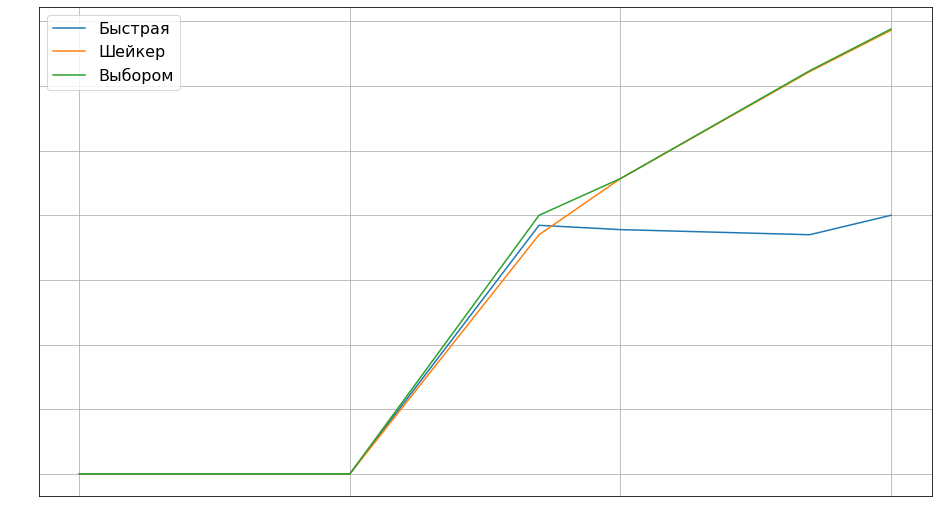

In [40]:
from matplotlib import pyplot as plt
plt.rc(('xtick', 'ytick'), color='white')

x = (100, 500, 1000, 5000, 10000, 50000, 100000)
y1 = (0.001, 0.001, 0.001, 7.001, 6.001, 5.001, 10.001)
y2 = (0.001, 0.001, 0.001, 5.001, 37.001, 1669., 7304.)
y3 = (0.001, 0.001, 0.001, 10.001, 37.001, 1723., 7638.)
plt.figure(figsize=(16, 9))
plt.grid()
plt.loglog(x, y1, label='Быстрая')
plt.loglog(x, y2, label='Шейкер')
plt.loglog(x, y3, label='Выбором')
plt.legend(fontsize=16)
plt.show()

Из графика следует, что из рассмотренных трёх алгоритмов быстрая сортировка наиболее оптимальна для больших объёмов данных (>5000 элементов). Для меньших объёмов данных существенной разницы между алгоритмами нет.